In [21]:
import numpy as np
import pandas as pd
import requests
import json
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import kaleido
import plotly
import time

## Define search engine version

In [5]:
if "SEARCH_VERSION" not in locals():
    SEARCH_VERSION = "new"
else:
    print(SEARCH_VERSION)

3.3


In [6]:
SEARCH_VERSION

3.3

## Import lastest elastic data

In [7]:
df_test = pd.read_csv("./data/elastic_wars.csv", dtype=str)

In [8]:
df_test.drop([911], axis=0, inplace=True)

In [9]:
df_test.head(3)

,terms,siren,results_elastic_3.1,pages_elastic_3.1,siren_elastic_3.1,resp_time_elastic_3.1,rank_elastic_3.1,results_elastic_3.2,pages_elastic_3.2,siren_elastic_3.2,resp_time_elastic_3.2,rank_elastic_3.2
0,stellantis,879786085,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.18854,0,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.100136,0
1,STELLANTIS,879786085,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.036261,0,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.074323,0
2,Stellantis,879786085,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.033536,0,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.219104,0


In [10]:
df_test.columns

Index(['terms', 'siren', 'results_elastic_3.1', 'pages_elastic_3.1',
       'siren_elastic_3.1', 'resp_time_elastic_3.1', 'rank_elastic_3.1',
       'results_elastic_3.2', 'pages_elastic_3.2', 'siren_elastic_3.2',
       'resp_time_elastic_3.2', 'rank_elastic_3.2'],
      dtype='object')

In [11]:
df_test.shape

(922, 12)

In [12]:
df_test.dtypes

terms                    object
siren                    object
results_elastic_3.1      object
pages_elastic_3.1        object
siren_elastic_3.1        object
resp_time_elastic_3.1    object
rank_elastic_3.1         object
results_elastic_3.2      object
pages_elastic_3.2        object
siren_elastic_3.2        object
resp_time_elastic_3.2    object
rank_elastic_3.2         object
dtype: object

## Call last search functions (maybe add description)

In [22]:
def find(key, dictionary):
    for k, v in dictionary.items():
        if k == key:
            yield v
        elif isinstance(v, dict):
            for result in find(key, v):
                yield result
        elif isinstance(v, list):
            for d in v:
                for result in find(key, d):
                    yield result

In [48]:
def get_response(url, q):
    params["q"] = q
    response = requests.get(url, params=params)
    time_elapsed = response.elapsed.total_seconds()
    content = json.loads(response.content)
    total_results = content["total_results"]
    total_pages = content["total_pages"]
    siren_list = [unite["siren"] for unite in content["results"]]
    return total_results, total_pages, siren_list, time_elapsed

In [49]:
url_elastic = "http://api.sirene.dataeng.etalab.studio/search"

In [50]:
# Get first 20 results
params = {"q": "", "page": "1", "per_page": "20"}

In [51]:
(
    df_test[f"results_elastic_{SEARCH_VERSION}"],
    df_test[f"pages_elastic_{SEARCH_VERSION}"],
    df_test[f"siren_elastic_{SEARCH_VERSION}"],
    df_test[f"resp_time_elastic_{SEARCH_VERSION}"],
) = ("", "", "", "")

In [52]:
df_test.columns

Index(['terms', 'siren', 'results_elastic_3.1', 'pages_elastic_3.1',
       'siren_elastic_3.1', 'resp_time_elastic_3.1', 'rank_elastic_3.1',
       'results_elastic_3.2', 'pages_elastic_3.2', 'siren_elastic_3.2',
       'resp_time_elastic_3.2', 'rank_elastic_3.2', 'results_elastic_3.3',
       'pages_elastic_3.3', 'siren_elastic_3.3', 'resp_time_elastic_3.3',
       'rank_elastic_3.3'],
      dtype='object')

In [53]:
df_test.head(3)

,terms,siren,results_elastic_3.1,pages_elastic_3.1,siren_elastic_3.1,resp_time_elastic_3.1,rank_elastic_3.1,results_elastic_3.2,pages_elastic_3.2,siren_elastic_3.2,resp_time_elastic_3.2,rank_elastic_3.2,results_elastic_3.3,pages_elastic_3.3,siren_elastic_3.3,resp_time_elastic_3.3,rank_elastic_3.3
0,stellantis,879786085,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.188540,0,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.100136,0,,,,,0
1,STELLANTIS,879786085,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.036261,0,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.074323,0,,,,,0
2,Stellantis,879786085,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.033536,0,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.219104,0,,,,,0


In [54]:
for index, row in df_test.iterrows():
    (
        df_test[f"results_elastic_{SEARCH_VERSION}"][index],
        df_test[f"pages_elastic_{SEARCH_VERSION}"][index],
        df_test[f"siren_elastic_{SEARCH_VERSION}"][index],
        df_test[f"resp_time_elastic_{SEARCH_VERSION}"][index],
    ) = get_response(url_elastic, row["terms"])
    if index % 5 == 0: 
        time.sleep(0.5)

In [55]:
df_test

,terms,siren,results_elastic_3.1,pages_elastic_3.1,siren_elastic_3.1,resp_time_elastic_3.1,rank_elastic_3.1,results_elastic_3.2,pages_elastic_3.2,siren_elastic_3.2,resp_time_elastic_3.2,rank_elastic_3.2,results_elastic_3.3,pages_elastic_3.3,siren_elastic_3.3,resp_time_elastic_3.3,rank_elastic_3.3
0,stellantis,879786085,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.188540,0,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.100136,0,9,1,"[879786085, 897921219, 897940953, 552144503, 3...",0.030551,0
1,STELLANTIS,879786085,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.036261,0,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.074323,0,9,1,"[879786085, 897921219, 897940953, 552144503, 3...",0.031384,0
2,Stellantis,879786085,7.0,1.0,"['879786085', '897921219', '910055672', '89794...",0.033536,0,9.0,1.0,"['879786085', '897921219', '897940953', '30247...",0.219104,0,9,1,"[879786085, 897921219, 897940953, 552144503, 3...",0.064181,0
3,air france,420495178,1313.0,66.0,"['420495178', '378006027', '314119504', '77574...",1.154233,0,1316.0,66.0,"['420495178', '378006027', '314119504', '77574...",0.539549,0,1339,67,"[420495178, 378006027, 314119504, 379369465, 7...",0.238125,0
4,Air france,420495178,1313.0,66.0,"['420495178', '378006027', '314119504', '77574...",1.085682,0,1316.0,66.0,"['420495178', '378006027', '314119504', '77574...",0.633556,0,1339,67,"[420495178, 378006027, 314119504, 379369465, 7...",0.235061,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,pontecaille gregoire,818452476,2.0,1.0,"['818452476', '484266358']",0.017371,0,2.0,1.0,"['818452476', '484266358']",0.019686,0,2,1,"[818452476, 484266358]",0.018876,0
919,sherpa,393825229,410.0,21.0,"['500913785', '531666956', '810600601', '39189...",0.042414,-1,414.0,21.0,"['500913785', '531666956', '534335666', '38936...",0.062981,-1,418,21,"[500913785, 531666956, 534335666, 807852439, 5...",0.056468,-1
920,sherpa,500913785,410.0,21.0,"['500913785', '531666956', '810600601', '39189...",0.053021,0,414.0,21.0,"['500913785', '531666956', '534335666', '38936...",0.083185,0,418,21,"[500913785, 531666956, 534335666, 807852439, 5...",0.057474,0
921,mc animation,820552925,6.0,1.0,"['440736965', '820552925', '398015974', '50865...",0.037613,1,6.0,1.0,"['440736965', '820552925', '398015974', '50865...",0.037660,1,9,1,"[820552925, 440736965, 398015974, 528547409, 8...",0.10166,0


In [56]:
elastic_columns = [
    col
    for col in df_test.columns
    if "elastic" in col and ("result" in col or "pages" in col or "resp_time" in col)
]

In [57]:
elastic_columns

['results_elastic_3.1',
 'pages_elastic_3.1',
 'resp_time_elastic_3.1',
 'results_elastic_3.2',
 'pages_elastic_3.2',
 'resp_time_elastic_3.2',
 'results_elastic_3.3',
 'pages_elastic_3.3',
 'resp_time_elastic_3.3']

In [58]:
for col in elastic_columns:
    df_test[col] = df_test[col].astype("float64")

In [59]:
df_test.dtypes

terms                     object
siren                     object
results_elastic_3.1      float64
pages_elastic_3.1        float64
siren_elastic_3.1         object
resp_time_elastic_3.1    float64
rank_elastic_3.1           int32
results_elastic_3.2      float64
pages_elastic_3.2        float64
siren_elastic_3.2         object
resp_time_elastic_3.2    float64
rank_elastic_3.2           int32
results_elastic_3.3      float64
pages_elastic_3.3        float64
siren_elastic_3.3         object
resp_time_elastic_3.3    float64
rank_elastic_3.3           int32
dtype: object

In [60]:
df_test.describe()

,results_elastic_3.1,pages_elastic_3.1,resp_time_elastic_3.1,rank_elastic_3.1,results_elastic_3.2,pages_elastic_3.2,resp_time_elastic_3.2,rank_elastic_3.2,results_elastic_3.3,pages_elastic_3.3,resp_time_elastic_3.3,rank_elastic_3.3
count,922.000000,922.000000,922.000000,922.00000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,352.373102,18.227766,0.247231,0.44577,353.066161,18.255965,0.078766,0.372017,354.633406,18.335141,0.070496,0.483731
std,1514.149250,75.612592,0.609350,1.81015,1515.919761,75.716022,0.073609,1.690299,1517.776912,75.779206,0.060514,1.969434
min,0.000000,0.000000,0.006045,-1.00000,0.000000,0.000000,0.006258,-1.000000,0.000000,0.000000,0.006109,-1.000000
25%,2.000000,1.000000,0.024566,0.00000,2.000000,1.000000,0.030007,0.000000,2.000000,1.000000,0.027536,0.000000
50%,9.000000,1.000000,0.049814,0.00000,9.000000,1.000000,0.060693,0.000000,9.000000,1.000000,0.054057,0.000000
75%,45.750000,3.000000,0.145067,0.00000,46.000000,3.000000,0.100721,0.000000,46.000000,3.000000,0.094182,0.000000
max,10000.000000,500.000000,7.029347,17.00000,10000.000000,500.000000,0.633556,17.000000,10000.000000,500.000000,0.486089,17.000000


In [527]:
df_test.describe().to_csv(
    f"./output/describe/describe_{SEARCH_VERSION}.csv", header=True, index=True
)

## Ranks

In [61]:
df_test[f"rank_elastic_{SEARCH_VERSION}"] = ""

In [62]:
for ind, row in df_test.iterrows():
    if str(row["siren"]) in row[f"siren_elastic_{SEARCH_VERSION}"]:
        df_test[f"rank_elastic_{SEARCH_VERSION}"][ind] = row[
            f"siren_elastic_{SEARCH_VERSION}"
        ].index(str(row["siren"]))
    else:
        df_test[f"rank_elastic_{SEARCH_VERSION}"][ind] = -1

In [63]:
df_test[f"rank_elastic_{SEARCH_VERSION}"] = df_test[
    f"rank_elastic_{SEARCH_VERSION}"
].astype("int32")

## KPIs

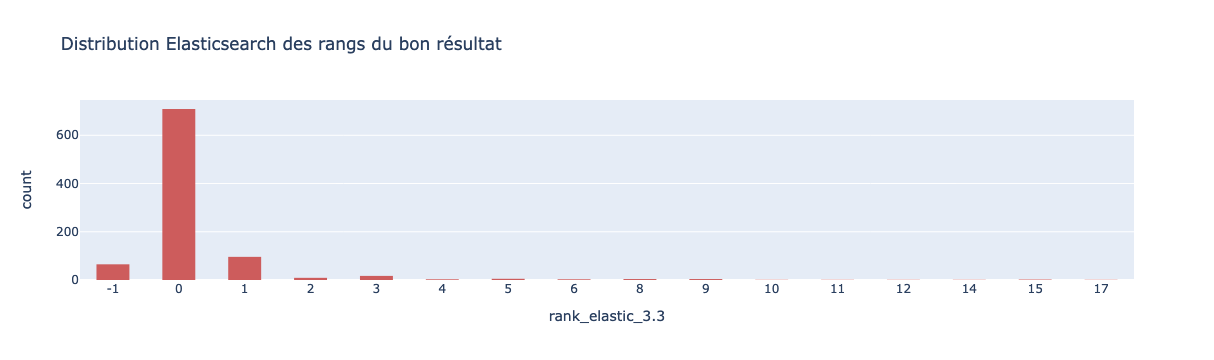

In [64]:
fig = px.histogram(
    df_test.sort_values(by=[f"rank_elastic_{SEARCH_VERSION}"]),
    x=f"rank_elastic_{SEARCH_VERSION}",
    color_discrete_sequence=["indianred"],
    title="Distribution Elasticsearch des rangs du bon résultat",
)
fig.update_layout(bargap=0.5)
fig.update_xaxes(type="category")
fig.show()

In [ ]:
plotly.offline.plot(fig, filename=f"./output/plots/rank_{SEARCH_VERSION}.html")

In [65]:
rank_columns = [col for col in df_test.columns if "rank_elastic" in col]

In [66]:
rank_columns

['rank_elastic_3.1', 'rank_elastic_3.2', 'rank_elastic_3.3']

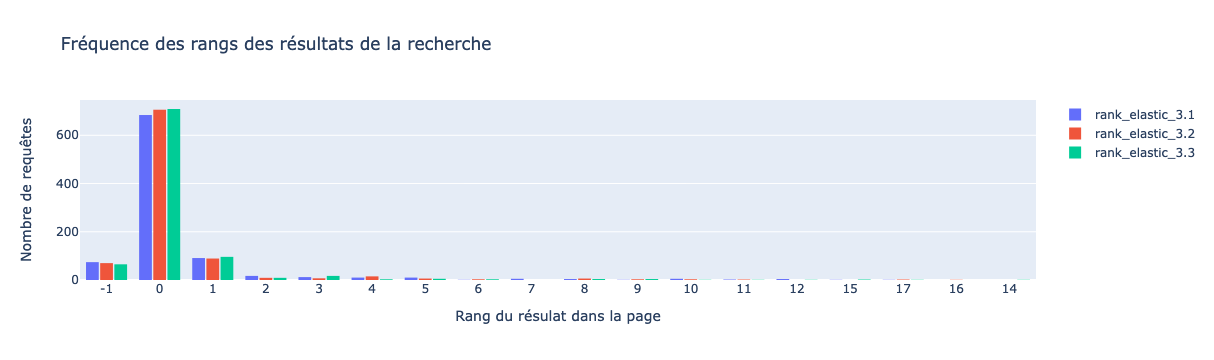

In [67]:
fig = go.Figure()
rank_dict = {}
for rank in rank_columns:
    df_test[rank] = df_test[rank].astype("int32")
    rank_dict[rank] = df_test.sort_values(by=[rank])[rank]
    fig.add_trace(
        go.Histogram(
            histfunc="count",
            x=rank_dict[rank],
            name=rank,
        )
    )
fig.update_layout(
    title_text="Fréquence des rangs des résultats de la recherche",  # title of plot
    xaxis_title_text="Rang du résulat dans la page",  # xaxis label
    yaxis_title_text="Nombre de requêtes",  # yaxis label
    bargap=0.2,  # gap between bars of adjacent location coordinates
    bargroupgap=0.1,  # gap between bars of the same location coordinates
)
fig.update_xaxes(type="category")
fig.show()
# fig.write_image(f"./output/plots/rank_{SEARCH_VERSION}.png")

In [68]:
df_test.loc[(df_test["rank_elastic_3.2"]==0) & (df_test["rank_elastic_3.3"]!=0)]

,terms,siren,results_elastic_3.1,pages_elastic_3.1,siren_elastic_3.1,resp_time_elastic_3.1,rank_elastic_3.1,results_elastic_3.2,pages_elastic_3.2,siren_elastic_3.2,resp_time_elastic_3.2,rank_elastic_3.2,results_elastic_3.3,pages_elastic_3.3,siren_elastic_3.3,resp_time_elastic_3.3,rank_elastic_3.3
213,APAVE SUDEUROPE,518720925,15.0,1.0,"['518720925', '452092620', '814972758', '77558...",0.083923,0,14.0,1.0,"['518720925', '452092620', '814972758', '77558...",0.134687,0,14.0,1.0,"[452092620, 518720925, 814972758, 392499232, 3...",0.069127,1
262,ENS rennes,130018484,42.0,3.0,"['572102176', '751609975', '186901567', '13001...",0.458533,3,42.0,3.0,"['130018484', '751609975', '821414562', '77775...",0.126380,0,41.0,3.0,"[751609975, 821414562, 777750100, 481414779, 5...",0.111185,-1
263,ens rennes,130018484,42.0,3.0,"['572102176', '751609975', '186901567', '13001...",0.419708,3,42.0,3.0,"['130018484', '751609975', '821414562', '77775...",0.105136,0,41.0,3.0,"[751609975, 821414562, 777750100, 481414779, 5...",0.117573,-1
284,BNP Paribas REIM France,300794278,2.0,1.0,"['300794278', '329570857']",0.038014,0,2.0,1.0,"['300794278', '329570857']",0.041230,0,2.0,1.0,"[329570857, 300794278]",0.039989,1
285,bnp reim france,300794278,2.0,1.0,"['300794278', '329570857']",0.032676,0,2.0,1.0,"['300794278', '329570857']",0.032963,0,2.0,1.0,"[329570857, 300794278]",0.034957,1
309,AS24,347538043,4.0,1.0,"['447896499', '347538043', '823602131', '30695...",0.058944,1,4.0,1.0,"['347538043', '447896499', '823602131', '30695...",0.019717,0,4.0,1.0,"[447896499, 347538043, 823602131, 306959065]",0.017217,1
310,as24,347538043,4.0,1.0,"['447896499', '347538043', '823602131', '30695...",0.055914,1,4.0,1.0,"['347538043', '447896499', '823602131', '30695...",0.017976,0,4.0,1.0,"[447896499, 347538043, 823602131, 306959065]",0.017301,1
458,ars nouvelle-aquitaine,130007867,4.0,1.0,"['130007867', '831450838', '903259570', '90188...",0.043685,0,4.0,1.0,"['130007867', '831450838', '903259570', '90188...",0.048168,0,4.0,1.0,"[831450838, 903259570, 901883868, 130007867]",0.036207,3
459,ARS Nouvelle Aquitaine,130007867,4.0,1.0,"['130007867', '831450838', '903259570', '90188...",0.039519,0,4.0,1.0,"['130007867', '831450838', '903259570', '90188...",0.049092,0,4.0,1.0,"[831450838, 903259570, 901883868, 130007867]",0.037555,3
460,DREAL Bourgogne-Franche-Comté,130009012,2.0,1.0,"['130009012', '501715445']",0.043843,0,2.0,1.0,"['130009012', '501715445']",0.066735,0,2.0,1.0,"[501715445, 130009012]",0.026498,1


In [ ]:
plotly.offline.plot(fig, filename=f"./output/plots/rank_war_{SEARCH_VERSION}.html")

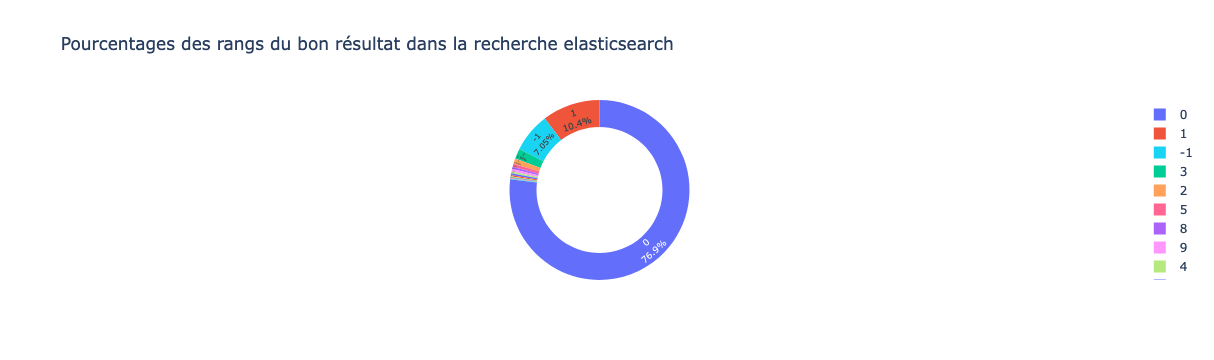

In [69]:
fig = px.pie(
    df_test,
    names=rank_columns[-1],
    hole=0.7,
    color=rank_columns[-1],
    title="Pourcentages des rangs du bon résultat dans la recherche elasticsearch",
)
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()

### Nombre maximale de requête


In [ ]:
plotly.offline.plot(fig, filename=f"./output/plots/pie_{SEARCH_VERSION}.html")

In [923]:
df_max = (
    df_test[f"results_elastic_{SEARCH_VERSION}"].value_counts(normalize=True) * 100
).reset_index()
df_max[df_max["index"] == "10000.0"].to_csv(
    f"./output/describe/max_requetes_{SEARCH_VERSION}.csv", header=True, index=True
)
df_max[df_max["index"] == "10000.0"]

,index,results_elastic_3.3


### Sauvegarder les dataframes

In [537]:
df_test.to_csv(f"./data/elastic_wars_{SEARCH_VERSION}.csv", header=True, index=False)

In [538]:
elastic_columns = [col for col in df_test.columns if "elastic" in col]
columns_to_save = ["terms", "siren"]
columns_to_save = columns_to_save + elastic_columns[-10:]
columns_to_save

['terms',
 'siren',
 'results_elastic_3',
 'pages_elastic_3',
 'siren_elastic_3',
 'resp_time_elastic_3',
 'rank_elastic_3',
 'results_elastic_3.1',
 'pages_elastic_3.1',
 'siren_elastic_3.1',
 'resp_time_elastic_3.1',
 'rank_elastic_3.1']

In [540]:
df_test.to_csv(
    f"./data/elastic_wars.csv", header=True, index=False, columns=columns_to_save
)